<a href="https://colab.research.google.com/github/Sacrezar/ex-data-analytics/blob/master/2_Hotel_booking_demand_Exercise/%5Bgoogle_colab%5D_2_Hotel_booking_demand_Exercise%20copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
When we hear about hotel booking we definitely hear about Trivago. Thanks to the large scale advertisement, I can't seem to get the ad out of my head. Needless to say, Trivago was the main platform I used for my hotel booking. The main few things I will usually consider include prices per night, distance of hotel from attractions and restaurants, availability of free breakfasts, scenery in hotel room, cleaniness of hotel room and of course, availability of free wifi. In this dataset, we ae able to know different types of bookings (i.e type of hotel, duration of stay, types of visitors, types of booking, etc).

# Column information
- **Hotel**
 * H1: Resort hotel
 * H2: City hotel
- **is_canceled**
 * 1: Canceled 
 * 0: Not canceled
- **lead_time**
 * No of days that elapsed between entering date of booking into property management system and arrival date
- **arrival_date_year**
 * Year of arrival date (2015-2017)
- **arrival_date_month**
 * Month of arrival date (Jan - Dec)
- **arrival_date_week_numberr**
 * Week number of year for arrival date (1-53)
- **arrival_date_day_of_month**
 * Day of arrival date
- **stays_in_weekend_nights**
 * No of weekend nights (Sat/Sun) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**
 * No of week nights (Mon - Fri) the guest stayed or booked to stay at the hotel
- **Adults** 
- **Children**
- **Babies**
- **meal** 
 * Type of meal booked. Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
- **country**
- **market_segment** (a group of people who share one or more common characteristics, lumped together for marketing purposes)
 * TA: Travel agents
 * TO: Tour operators 
- **distribution_channel** (A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer)
 * TA: Travel agents
 * TO: Tour operators
- **is_repeated_guest** (value indicating if the booking name was from repeated guest)
 * 1: Yes
 * 0: No
- **previous_cancellations**
 * Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_canceled**
 * Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**
 * Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**
 * Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
- **booking_changes**
 * Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- **deposit_type**
 * Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- **agent**
 * ID of the travel agency that made the booking 
- **company**
 * ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- **day_in_waiting_list**
 * Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**
 * Contract - when the booking has an allotment or other type of contract associated to it; 
 * Group – when the booking is associated to a group; 
 * Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
 * Transient-party – when the booking is transient, but is associated to at least other transient booking
- **adr (average daily rate)**
 * average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- **required_car_parking_spaces**
 * Number of car parking spaces required by the customer 
- **total_of_special_requests**
 * Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**
 * Canceled – booking was canceled by the customer; 
 * Check-Out – customer has checked in but already departed; 
 * No-Show – customer did not check-in and did inform the hotel of the reason why
- **reservation_status_date**
 * Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


# Objective
- Create a indepth analysis to figure out the standard patterns of booking
- Generate a report for Michael Scott, the new marketing manager of Trivago so he can derive a strategy for the marketing team. As a newly hired data analyst, you have been assigned this task as majority of your colleagues (except for Kevin Malone) were quarantined after you spread the coronavirus to them. You need to win them back! Kevin Malone has completed his analysis from year 2018 to 2019 and is currently in a meeting with Michael in his office. You will work with data from year 2015 to 2017. 

# Requirement

In [0]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset into notebook and using head() to look at the first 5 rows of data


In [203]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [204]:
data.shape

(119390, 32)

In [172]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Looks like we have quite alot of NaN values in company and agent.Highly doubt they have an impact on the analysis and will remove the 2 columns. The reason why we can't remove rows with NaN value is because that will mean we are removing 112593 rows out of 119390 rows. So removing columns will be a better idea since those 2 attributes (agents and companies) are unimportant. 

In [0]:
data = data.drop(columns = ['agent', 'company'])

### 488 rows out of 119390 is negligible hence I will just remove.
- This can be done using data.dropna(axis = 0)
 * **Axis = 0** will access elements in the direction of the rows, up to down.
 * **Axis = 1** will access elements in the direction of the columns, left to right. 

In [174]:
data = data.dropna(axis = 0)

# Check to see if there are any more NaN data 
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Data Exploitation

## Overview of the type of hotel
- Since there are only 2 types (resort or city), we can simply use a barchart or pie chart to show.

Labels: ['City Hotel', 'Resort Hotel']
sizes: [79302, 39596]


([<matplotlib.patches.Wedge at 0x7f83461595f8>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(0.9953715685715618, 0.5759647910066975, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.5626013213665348, 0.3255453166559594, '33.3%')])

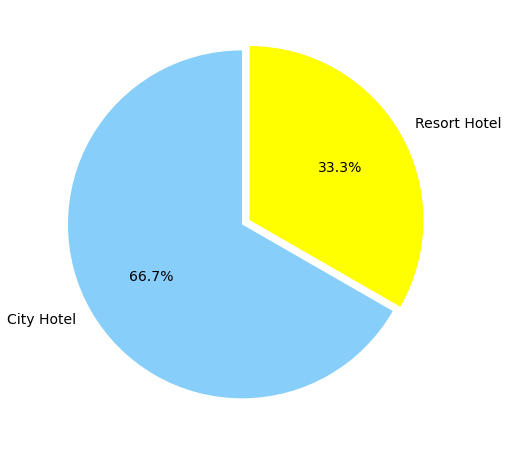

In [175]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = data['hotel'].value_counts().index.tolist()
print(f'Labels: {labels}')
# Convert value counts to list
sizes = data['hotel'].value_counts().tolist()
print(f'sizes: {sizes}')

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.05)

# Determine colour of pie chart
colors = ['lightskyblue','yellow']

# Putting them together. Sizes with the count, explode with the magnitude of separation between pies, colors with the colors, 
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})


## Let's have an overview of the number of people who booked the hotel.

In [201]:
# Looking into adults. 
data['adults'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,1.851126,0.509013,0.0,2.0,2.0,2.0,4.0
Resort Hotel,39596.0,1.872942,0.697112,0.0,2.0,2.0,2.0,55.0


In [199]:
# Looking into children. 
data['children'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.091397,0.372230,0.0,0.0,0.0,0.0,3.0
Resort Hotel,39596.0,0.129862,0.447192,0.0,0.0,0.0,0.0,10.0


In [198]:
# Looking into babies. 
data['babies'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,0.004943,0.084338,0.0,0.0,0.0,0.0,10.0
Resort Hotel,39596.0,0.013966,0.119061,0.0,0.0,0.0,0.0,2.0


It seems that mean values for adults, children, babies are higher. This means that resort hotels are better choice for large families.

## Overview of canceled bookings 



not_canceled / canceled :[74745, 44153]


Text(0.5, 1.0, 'Number of cancellation and continuation')

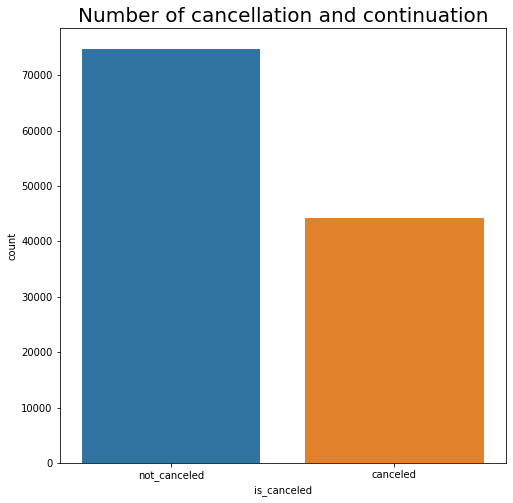

In [179]:
data['is_canceled'] = data.is_canceled.replace([0,1], ['not_canceled', 'canceled'])
canceled_data = data['is_canceled']
print("not_canceled / canceled :" + str(canceled_data.value_counts().tolist()))
sns.countplot(canceled_data).set_title("Number of cancellation and continuation",fontsize=20)

It seems that majority of the bookings were not canceled. 



### Let's look into cancellation rate among different type of hotel.

Text(0.5, 1.0, 'Cancellation rates in city and resort hotel')

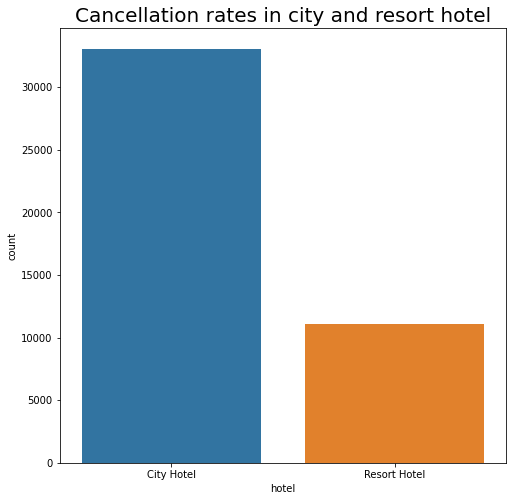

In [180]:
lst1 = ['is_canceled', 'hotel']
type_of_hotel_canceled = data[lst1]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'count').set_title('Cancellation rates in city and resort hotel', fontsize=20)


We have seen a huge proportion of cancellation from city hotel. This was expected since 3/4 of the hotel bookings belong to city hotels. 

## Overview of arrival period

Text(0.5, 1.0, 'Number of arrival per year')

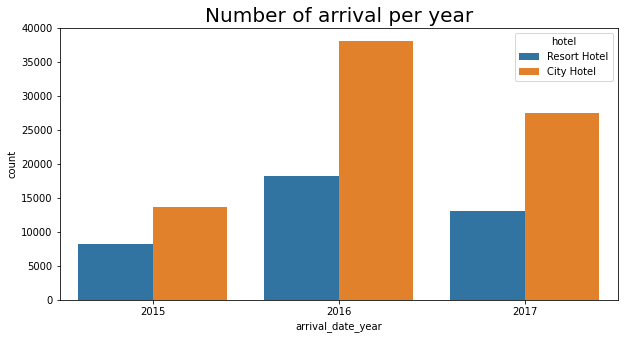

In [181]:
# Look into arrival year (arrival_date_year)
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month', 'arrival_date_week_number']
period_arrival = data[lst3]
plt.figure(figsize=(10,5))
# Countplot is useful for working with categorical data. It creates a count for you automatically, which means you don't need to write lines of code to calculate. 
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel').set_title('Number of arrival per year',fontsize=20) #In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.

Text(0, 0.5, 'Count')

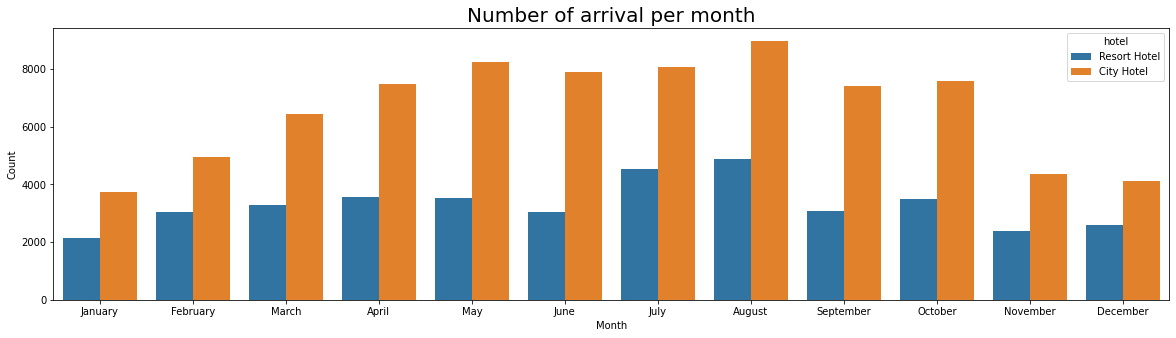

In [182]:
plt.figure(figsize=(20,5)) # adjust the size of the plot

# Countplot is useful for working with categorical data. It creates a count for you automatically, which means you don't need to write lines of code to calculate. 
sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Number of arrival per month',fontsize=20)
plt.xlabel('Month') # Creating label for xaxis
plt.ylabel('Count') # Creating label for yaxis

Text(0.5, 1.0, 'Number of arrival per week number')

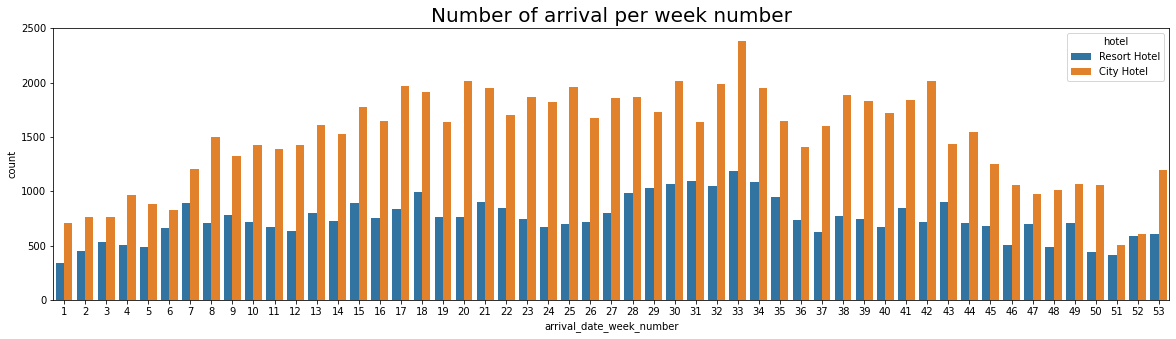

In [183]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_week_number', hue = 'hotel').set_title('Number of arrival per week number', fontsize = 20)

Text(0.5, 1.0, 'Number of arrival per day')

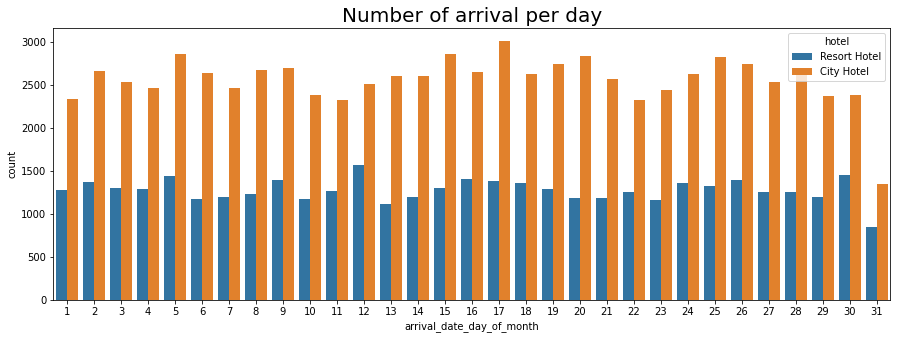

In [184]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Number of arrival per day', fontsize = 20)

### Let's dig deeper into whether the stay is over a weekend or weekday.

Text(0.5, 1.0, 'Number of stays on weekend nights')

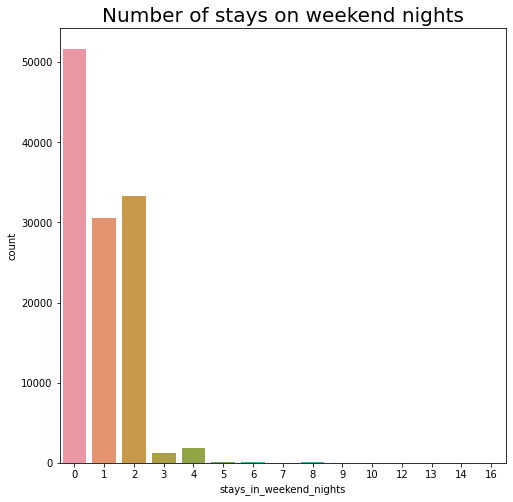

In [185]:
sns.countplot(data = data, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Text(0.5, 1.0, 'Number of stays on weekday night')

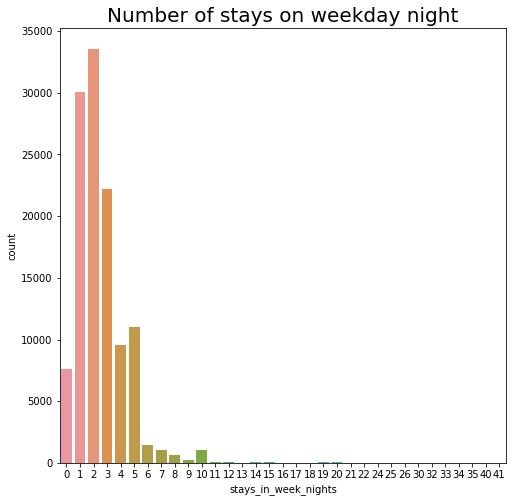

In [186]:
sns.countplot(data = data, x = 'stays_in_week_nights' ).set_title('Number of stays on weekday night' , fontsize = 20)

## Type of visitors 

Text(0.5, 1.0, 'Number of adults')

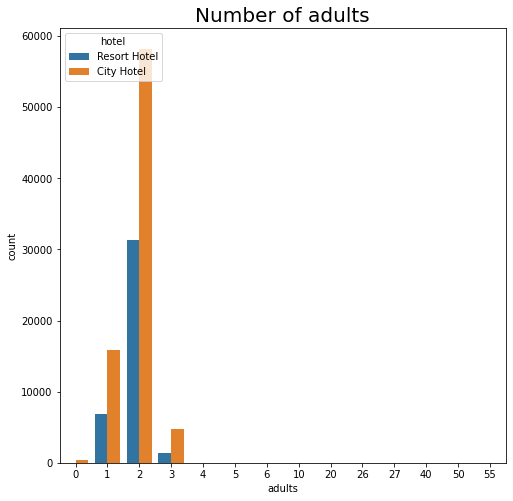

In [187]:
sns.countplot(data = data, x = 'adults', hue = 'hotel').set_title("Number of adults", fontsize = 20)

Text(0.5, 1.0, 'Number of children')

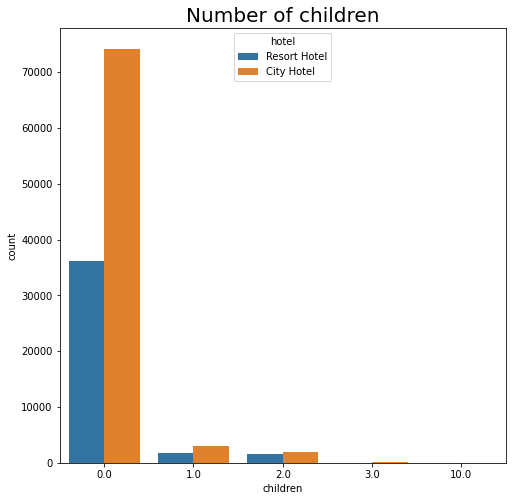

In [188]:
sns.countplot(data = data, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

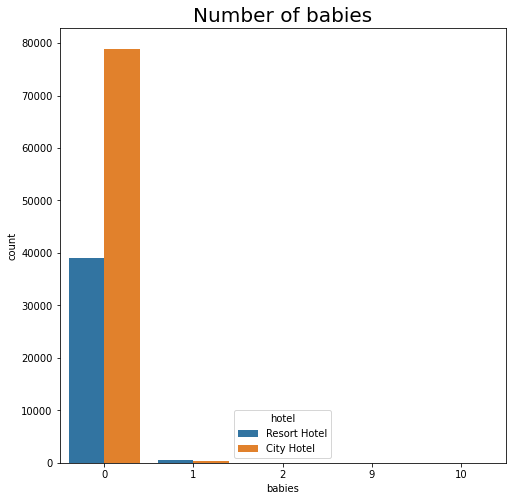

In [189]:
sns.countplot(data = data, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

## Which countries the visitors are from
We will want visitors with no cancellation and group them by countries.

In [190]:
country_visitors = data[data['is_canceled'] == 'not_canceled'].groupby(['country']).size().reset_index(name = 'count')

# We will be using Plotly.express to plot a choropleth map. Big fan of Plotly here!
!pip install plotly
import plotly.express as px

px.choropleth(country_visitors,
                    locations = "country",
                    color= "count", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

## Market segments and distribution channel

Text(0.5, 1.0, 'Types of market segment')

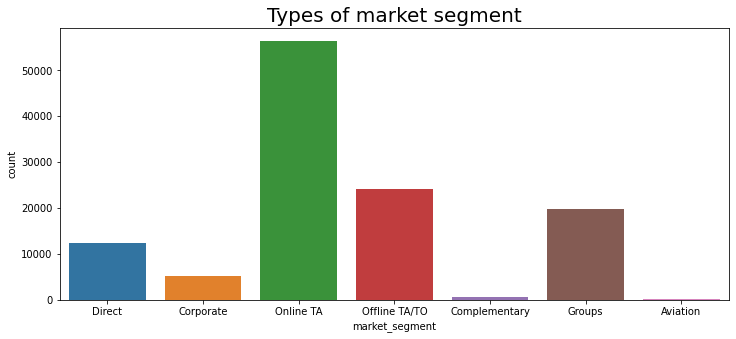

In [191]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

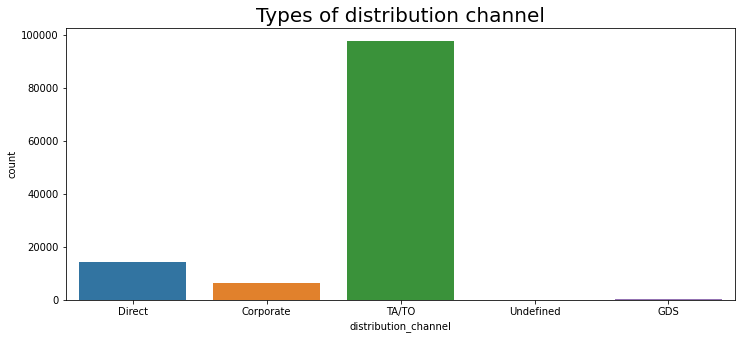

In [192]:
plt.figure(figsize=(12,5))
sns.countplot(data = data, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

## Deposit types

Text(0.5, 1.0, 'Graph showing types of deposits')

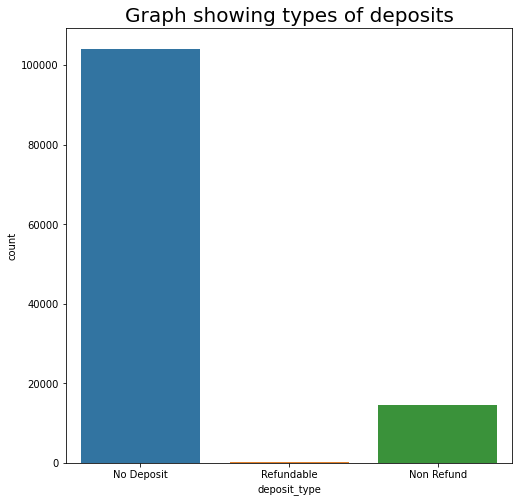

In [193]:
sns.countplot(data = data, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)

- Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate. 

## Overview of repeated guests

Text(0.5, 1.0, 'Whether guest is repeated guest')

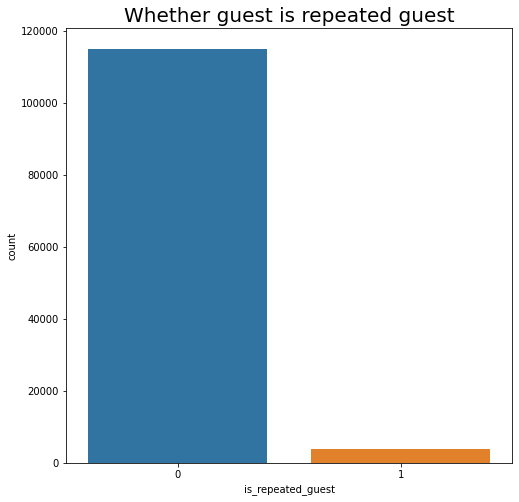

In [194]:
sns.countplot(data = data, x = 'is_repeated_guest').set_title('Whether guest is repeated guest', fontsize = 20)

## Length of time from booking until arrival 


In [202]:
data['lead_time'].groupby(data['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79302.0,109.740183,110.953223,0.0,23.0,74.0,163.0,629.0
Resort Hotel,39596.0,93.438857,97.387321,0.0,11.0,59.0,155.0,737.0


Text(0, 0.5, 'Bookings')

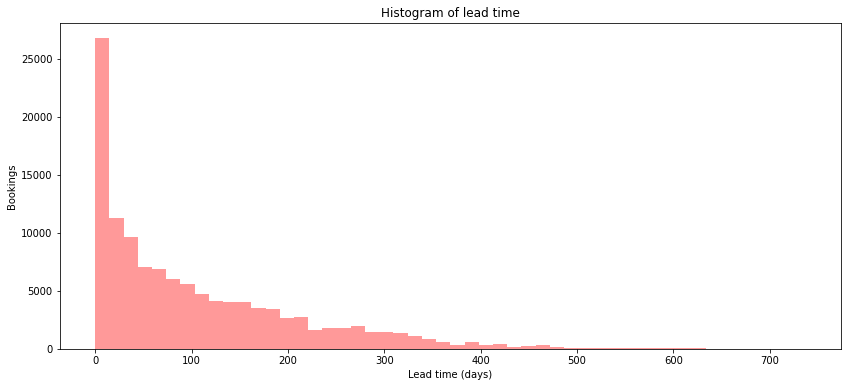

In [216]:
plt.figure(figsize=(14,6))
sns.distplot(data['lead_time'], hist=True, kde=False, 
              color = 'red')
# Add labels
plt.title('Histogram of lead time')
plt.xlabel('Lead time (days)')
plt.ylabel('Bookings')


## Types of guests

Text(0.5, 1.0, 'Type of guest')

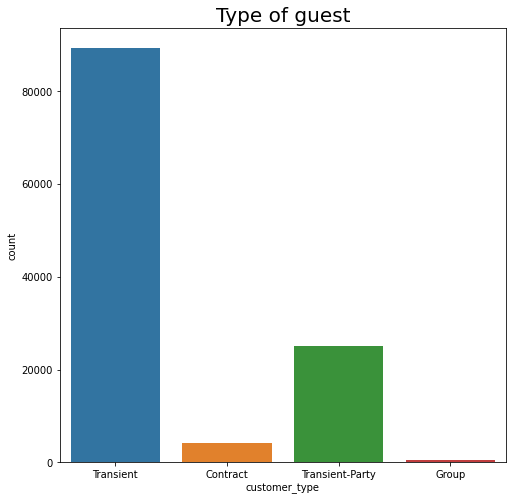

In [195]:
sns.countplot(data = data, x = 'customer_type').set_title('Type of guest', fontsize = 20)

## Prices per month per hotel
- average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
- average daily rate per person =  $ \frac{ADR}{Adults + Children}$
- We will need to find out average daily rate per person

In [0]:
# convert months to ordered categorical dtype so they won't appear in alphabetical order on the graph and will be in normal order instead
cats = ['January','February','March','April','May','June',
        'July','August','September','October','November','December']

#discovered a function to rotate a list
months = data['arrival_date_month'].unique().tolist()
from collections import deque 
months = deque(months) 
months.rotate(-6) 
months = list(months)

#to specify that categorical datatype is ordered:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=months, ordered=True)
data['arrival_date_month'] = data['arrival_date_month'].astype(cat_type)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Prices fluctuation per month per hotel')

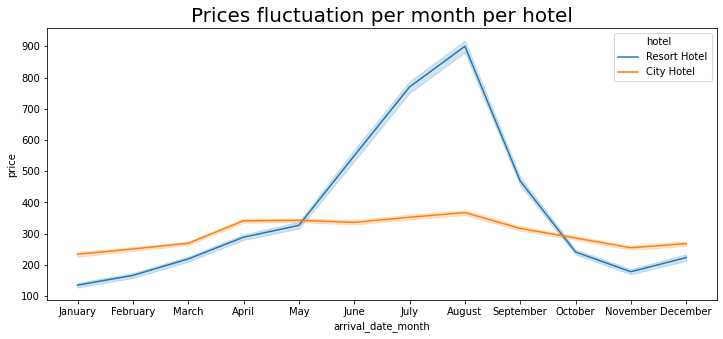

In [197]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']) 
actual_guests = data.loc[data["is_canceled"] == 'not_canceled']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', estimator='mean').set_title('Prices fluctuation per month per hotel', fontsize=20)

# **Conclusion**

### All points
- It seems that a huge proportion of hotels was city hotel. Resort hotel tend to be on the expensive side and most people will just stick with city hotel.
- Resort hotels tend to be appropriate for larger group of people. 
- Prices of city hotel stay pretty much the same throughout the year.
- Prices of resort hotel are much higher than those at the City Hall especially in summer where they start to rise in May and peak in August.
- Majority of the bookings are transient. This means that the booking is not part of a group or contract. With the ease of booking directly from the website, most people tend to skip the middleman to ensure quick response from their booking. 
- Majority of the booking does not require deposit. That could explain why cancellation rate was actually 50% of non-cancellation rate. 
- Low number of repeated guests.
- A need to target repeated guests since they have booked before. 
- We have a huge number of visitors from western europe, namely France,UK and Portugal being the highest. We can instruct the marketing team to target people of this region.
- Majority of the distribution channels and market segments involve travel agencies (online or offline). 
- We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.
- It seems that majority of the visitors travel in pair. Those that travel with children or babies have no specific preference for the type of hotel. We do see that those bringing babies along prefer resort hotels.
- It seems that majority of the stays are over the weekday's night. Hence, it seems that whatever we saw for the chart on day of the month was random. 
- I can see that 2016 seems to be the year where hotel booking is at its highest. We also see an increasing trend in booking around the middle of the year, with August being the highest. Summer ends around August, followed straight by autumn. It seems that summer period is a peak period for hotel booking. 
- We do notice a roller coaster trend for the arrival day of month. Could the peaks belong to a weekend? (i.e Will people tend to book over the weekends?
- A large group of person book at the last moment (one week early or even the day of arrival)

---
### Résumé

Most people book at the last moment and there are more people booking on summer. Meaning rising the price at this moment is highly effective. Majority of people travel in pair and those travelling with children or babies have no specific preference for the type of hotel. Majority of the distribution channels and market segments involve travel agencies (online or offline). 